# Transfer Learning MNIST

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [0]:
from keras.backend import backend
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


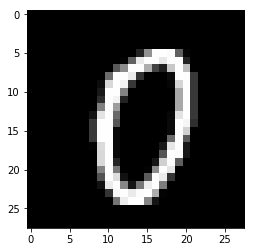

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
X_train1 , y_train1 = X_train[y_train <=4], y_train[y_train<=4] 
X_test1 , y_test1 = X_test[y_test <=4], y_test[y_test<=4]

X_train2 , y_train2 = X_train[y_train >4], y_train[y_train>4] 
X_test2 , y_test2 = X_test[y_test >4], y_test[y_test>4] 

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [0]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(30596, 28, 28)
(30596,)
(5139, 28, 28)
(5139,)
(29404, 28, 28)
(29404,)
(4861, 28, 28)
(4861,)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train1 = X_train1.reshape(X_train1.shape[0], 28, 28,1).astype('float32')
X_test1 = X_test1.reshape(X_test1.shape[0], 28, 28, 1).astype('float32')



## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
from keras.utils import np_utils
X_train1 /= 255
X_test1 /= 255


### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [0]:
print('X_train shape:', X_train1.shape)
print(X_train1.shape[0], 'train samples')
print(X_test1.shape[0], 'test samples')

X_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
y_train1 = np_utils.to_categorical(y_train1, 5)
y_test1 = np_utils.to_categorical(y_test1, 5)

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D



# Define the Type of Model
model = Sequential()

    # 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28,1)))
model.add(Activation('relu'))

    # 2nd Conv Layer
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
    
    
#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

#Apply Dropout with 0.2 probability 
model.add(Dropout(0.2))



    
    


## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
num_classes=5

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.2 probability 
model.add(Dropout(0.2,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax',name='dense_2'))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [0]:
from keras.losses import categorical_crossentropy

model.compile(loss=categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])



In [0]:
print(X_test1.shape)
print(y_test1.shape)


(5139, 28, 28, 1)
(5139, 5)


In [0]:
model.fit(X_train1, y_train1,
          batch_size=128,
          epochs=10,
          validation_data=(X_test1, y_test1))




Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 4s 120us/step - loss: 0.5602 - acc: 0.8457 - val_loss: 0.1153 - val_acc: 0.9698
Epoch 2/10
30596/30596 [==============================] - 3s 98us/step - loss: 0.1611 - acc: 0.9506 - val_loss: 0.0879 - val_acc: 0.9745
Epoch 3/10
30596/30596 [==============================] - 3s 98us/step - loss: 0.1340 - acc: 0.9591 - val_loss: 0.0718 - val_acc: 0.9792
Epoch 4/10
30596/30596 [==============================] - 3s 99us/step - loss: 0.1163 - acc: 0.9640 - val_loss: 0.0888 - val_acc: 0.9700
Epoch 5/10
30596/30596 [==============================] - 3s 100us/step - loss: 0.1054 - acc: 0.9680 - val_loss: 0.1749 - val_acc: 0.9393
Epoch 6/10
30596/30596 [==============================] - 3s 99us/step - loss: 0.0995 - acc: 0.9693 - val_loss: 0.0503 - val_acc: 0.9864
Epoch 7/10
30596/30596 [==============================] - 3s 101us/step - loss: 0.0867 - acc: 0.9736 - val_loss: 0.0453 - val_a

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [0]:
#Testing the model on test set
score = model.evaluate(X_test1, y_test1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5139/5139 [==============================] - 0s 90us/step
Test loss: 0.03853719613795198
Test accuracy: 0.9891029383148473


## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False
    
#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))


conv2d_11
False
activation_11
False
conv2d_12
False
activation_12
False
max_pooling2d_5
False
dropout_5
False
flatten_7
False
dense_1
True
drop_2
False
dense_2
True


### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [0]:
 y_train2 = y_train[y_train>4] - 5
 y_test2 =  y_test[y_test>4] - 5

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train2 = X_train2.reshape(X_train2.shape[0], 28, 28,1).astype('float32')
X_test2 = X_test2.reshape(X_test2.shape[0], 28, 28, 1).astype('float32')

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
X_train2 /= 255
X_test2 /= 255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [0]:
print('X_train2 shape:', X_train2.shape)
print(X_train2.shape[0], 'train samples')
print(X_test2.shape[0], 'test samples')

X_train2 shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
y_train2 = np_utils.to_categorical(y_train2, 5)
y_test2 = np_utils.to_categorical(y_test2, 5)

In [0]:
print(X_train2.shape)
print(y_test2.shape)

(29404, 28, 28, 1)
(4861, 5)


### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [0]:
model.fit(X_train2, y_train2,
          batch_size=128,
          epochs=10,
          validation_data=(X_test2, y_test2))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 3s 102us/step - loss: 0.4237 - acc: 0.8640 - val_loss: 0.1780 - val_acc: 0.9426
Epoch 2/10
29404/29404 [==============================] - 3s 98us/step - loss: 0.2091 - acc: 0.9326 - val_loss: 0.1289 - val_acc: 0.9593
Epoch 3/10
29404/29404 [==============================] - 3s 99us/step - loss: 0.1715 - acc: 0.9447 - val_loss: 0.1090 - val_acc: 0.9630
Epoch 4/10
29404/29404 [==============================] - 3s 97us/step - loss: 0.1519 - acc: 0.9504 - val_loss: 0.0960 - val_acc: 0.9696
Epoch 5/10
29404/29404 [==============================] - 3s 99us/step - loss: 0.1365 - acc: 0.9561 - val_loss: 0.0888 - val_acc: 0.9710
Epoch 6/10
29404/29404 [==============================] - 3s 98us/step - loss: 0.1252 - acc: 0.9581 - val_loss: 0.0837 - val_acc: 0.9712
Epoch 7/10
29404/29404 [==============================] - 3s 98us/step - loss: 0.1202 - acc: 0.9617 - val_loss: 0.0762 - val_acc

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [0]:
#Testing the model on test set
score1 = model.evaluate(X_test2, y_test2)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

4861/4861 [==============================] - 1s 103us/step
Test loss: 0.06671723045563531
Test accuracy: 0.9777823492004851


-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [0]:
import pandas as pd

tweetsdf = pd.read_csv("/content/drive/My Drive/Great Learning/tweets.csv",encoding='latin1')

### Drop null values
- drop all the rows with null values

In [0]:
tweetsdf.shape

(9093, 3)

In [0]:
new_tweetsdf = tweetsdf.dropna(axis = 0)

In [0]:
new_tweetsdf.shape

(3291, 3)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [0]:
new_tweetsdf.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
tweets= new_tweetsdf.apply(lambda x: x.astype(str).str.lower())

print dataframe

In [0]:
tweets.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,positive emotion
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,positive emotion


In [0]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s+#_]' if not remove_digits else r'[^a-zA-z0-9\s+#_]'
    text = re.sub(pattern, '', str(text))
    lentext = len(text)
    print(lentext)
    afterstrip= text.strip()
    print(len(afterstrip))
    return afterstrip

In [0]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

tweetsnew=remove_special_characters(tweets, remove_digits=True)

6479
6434


In [0]:
tweetsnew

'tweet_text   is_there_an_emotion_directed_at_a_brand_or_product\n0     wesley83 i have a 3g iphone after 3 hrs twe                                     negative emotion\n1     jessedee know about fludapp  awesome ipadi                                     positive emotion\n2     swonderlin can not wait for #ipad 2 also the                                     positive emotion\n3     sxsw i hope this years festival isnt as cra                                     negative emotion\n4     sxtxstate great stuff on fri #sxsw marissa m                                     positive emotion\n7     #sxsw is just starting #ctia is around the co                                     positive emotion\n8     beautifully smart and simple idea rt madebyma                                     positive emotion\n9     counting down the days to #sxsw plus strong ca                                     positive emotion\n10    excited to meet the samsungmobileus at #sxsw                                      positi

## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [0]:
new_tweetsdf.iloc[:,2]

0                         Negative emotion
1                         Positive emotion
2                         Positive emotion
3                         Negative emotion
4                         Positive emotion
7                         Positive emotion
8                         Positive emotion
9                         Positive emotion
10                        Positive emotion
11                        Positive emotion
12                        Positive emotion
13                        Positive emotion
14                        Positive emotion
15                        Positive emotion
17                        Negative emotion
18                        Positive emotion
19                        Positive emotion
20                        Positive emotion
21                        Positive emotion
22                        Positive emotion
23                        Positive emotion
24                        Positive emotion
25                        Positive emotion
26         

In [0]:
new_tweetsdf.shape

(3291, 3)

In [0]:
twtDF=twtDF[(twtDF['is_there_an_emotion_directed_at_a_brand_or_product']=='positive emotion') | (twtDF['is_there_an_emotion_directed_at_a_brand_or_product']=='negative emotion')]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion
12,"Foursquare ups the game, just in time for #SXS...",Android App,Positive emotion
13,Gotta love this #SXSW Google Calendar featurin...,Other Google product or service,Positive emotion


In [0]:
filtereddf.head()

NameError: ignored

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

### Fit the classifer
- fit logistic regression classifier

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

### Fit the classifer
- fit naive bayes classifier

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score